In [64]:
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
from IPython.display import JSON

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wallstreetbets/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wallstreetbets/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
# pull api from youtube credentials 
api_key = '##############'

In [66]:
channel_ids = ['UCX6OQ3DkcsbYNE6H8uQQuVA',
              # more channels here
              
              ]

In [67]:
api_service_name = "youtube"
api_version = "v3"
    

    # Get credentials and create an API client no user authentification
    
youtube = build(
    api_service_name, api_version, developerKey=api_key)


In [68]:
def get_channel_stats(youtube, channel_ids):
    
    all_data = []

    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id= ','.join(channel_ids)
    )
    response = request.execute()
    
    # loop though items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']                         
        }               

        all_data.append(data)
                                   

    return(pd.DataFrame(all_data))

In [69]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [70]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,MrBeast,135000000,22825311283,735,UUX6OQ3DkcsbYNE6H8uQQuVA


In [71]:
playlist_id = "UUX6OQ3DkcsbYNE6H8uQQuVA"


def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids



In [72]:
video_ids = get_video_ids(youtube, playlist_id)

In [73]:
len(video_ids)


735

In [74]:
def get_video_details(youtube, video_ids):

        
    all_video_info = []
    
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
            
        return pd.DataFrame(all_video_info)

In [75]:
video_df = get_video_details(youtube, video_ids)

In [76]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,lglIQkCHO0g,MrBeast,How Tall Are You?,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,None,2023-02-14T21:00:14Z,26254509,1755410,None,9256,PT47S,hd,false
1,TJ2ifmkGGus,MrBeast,"1,000 Blind People See For The First Time",If you would like to support more of this sigh...,None,2023-01-28T21:00:00Z,114129362,8711865,None,370723,PT8M1S,hd,true
2,7IKab3HcfFk,MrBeast,I Survived 50 Hours In Antarctica,Check out my interview! http://bit.ly/Shopify-...,None,2022-12-24T20:59:59Z,97262601,3985360,None,149862,PT12M10S,hd,true
3,h5NvTTOlOtI,MrBeast,Hydraulic Press Vs Lamborghini,Hello Neighbor 2 is out now on PC & Consoles!\...,None,2022-12-10T21:00:01Z,120424466,4538868,None,128246,PT10M25S,hd,true
4,se50viFJ0AQ,MrBeast,Would You Fly To Paris For A Baguette?,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,None,2022-12-08T20:12:27Z,569884610,29191739,None,61838,PT48S,hd,false
5,0CTp1a-aCUM,MrBeast,"100 Kids Vs 100 Adults For $500,000",The new Nerf Pro Gelfire x MrBeast blaster is ...,None,2022-12-03T21:00:00Z,118632307,3256403,None,93924,PT15M23S,hd,true
6,FD-0KG-h2-c,MrBeast,Gordon Ramsay Tries Most Expensive Chocolate Bar!,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,None,2022-11-19T20:59:59Z,137002585,8962809,None,22026,PT41S,hd,false
7,kX3nB4PpJko,MrBeast,"Last To Take Hand Off Jet, Keeps It!",Close this and watch to the end to see who win...,None,2022-11-12T21:00:00Z,93102896,3368865,None,104784,PT15M37S,hd,true
8,YlvcFJOE-OE,MrBeast,Giving iPhones Instead Of Candy on Halloween,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,None,2022-11-02T21:00:01Z,443264242,18398500,None,75012,PT40S,hd,false
9,iogcY_4xGjo,MrBeast,"$1 vs $1,000,000 Hotel Room!",The hotel at the end is worth the wait!\n\nDow...,None,2022-10-22T21:00:00Z,171572094,5139892,None,110940,PT15M41S,hd,true


In [77]:
def get_comments_in_videos(youtube, video_ids):

    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)  

In [78]:
comments_df

,video_id,comments
0,lglIQkCHO0g,"[my boy almost got 10k mid pick walk lmao, D, ..."
1,TJ2ifmkGGus,[Subscribe!! I’d hate for you to miss the next...
2,7IKab3HcfFk,"[Subscribe and you could be in a video!, HI Mr..."
3,h5NvTTOlOtI,[Make sure you watch to the end for the real e...
4,se50viFJ0AQ,"[WoW cool man, Да, НАНАНАНАНАНАНАНА, can i hav..."
...,...,...
728,7qj3nuF9Dzw,"[Don’t ask, Hi bro your all videos awesome 😎, ..."
729,Y74b7WlcEpk,"[I just got home from baseball practice lol, H..."
730,Z8nEEdXTaX0,[I bought a new mic but it turned out to be wo...
731,jP82d277Cc8,[I remember filming this with my horrible lapt...


In [79]:
comments_df['comments'][0]

['my boy almost got 10k mid pick walk lmao',
 'D',
 '슈타게 맨투맨 이쁘네',
 'You should really help people who are in real need around the globe instead of throwing money just for fun',
 "I'm 6'11",
 '1500 can literally solve all my problems 😔',
 "I'm 182,3",
 'great',
 '더빙이 개지리네ㅋㅋㅋㅋㅋㅋㅋㅋ',
 'Mrbeast eri pura farza']

# Data Processing

In [80]:
# Check for NULL values
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [81]:
# Check data types
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [82]:
# Convert count columns to numeric
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [83]:
# Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [84]:
# convert duration to seconds
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [85]:
video_df[['durationSecs', 'duration']] 

,durationSecs,duration
0,47.0,PT47S
1,481.0,PT8M1S
2,730.0,PT12M10S
3,625.0,PT10M25S
4,48.0,PT48S
5,923.0,PT15M23S
6,41.0,PT41S
7,937.0,PT15M37S
8,40.0,PT40S
9,941.0,PT15M41S


In [86]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [87]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,lglIQkCHO0g,MrBeast,How Tall Are You?,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,None,2023-02-14 21:00:14+00:00,26254509.0,1755410.0,NaN,9256.0,PT47S,hd,false,Tuesday,47.0,0
1,TJ2ifmkGGus,MrBeast,"1,000 Blind People See For The First Time",If you would like to support more of this sigh...,None,2023-01-28 21:00:00+00:00,114129362.0,8711865.0,NaN,370723.0,PT8M1S,hd,true,Saturday,481.0,0
2,7IKab3HcfFk,MrBeast,I Survived 50 Hours In Antarctica,Check out my interview! http://bit.ly/Shopify-...,None,2022-12-24 20:59:59+00:00,97262601.0,3985360.0,NaN,149862.0,PT12M10S,hd,true,Saturday,730.0,0
3,h5NvTTOlOtI,MrBeast,Hydraulic Press Vs Lamborghini,Hello Neighbor 2 is out now on PC & Consoles!\...,None,2022-12-10 21:00:01+00:00,120424466.0,4538868.0,NaN,128246.0,PT10M25S,hd,true,Saturday,625.0,0
4,se50viFJ0AQ,MrBeast,Would You Fly To Paris For A Baguette?,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,None,2022-12-08 20:12:27+00:00,569884610.0,29191739.0,NaN,61838.0,PT48S,hd,false,Thursday,48.0,0
5,0CTp1a-aCUM,MrBeast,"100 Kids Vs 100 Adults For $500,000",The new Nerf Pro Gelfire x MrBeast blaster is ...,None,2022-12-03 21:00:00+00:00,118632307.0,3256403.0,NaN,93924.0,PT15M23S,hd,true,Saturday,923.0,0
6,FD-0KG-h2-c,MrBeast,Gordon Ramsay Tries Most Expensive Chocolate Bar!,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,None,2022-11-19 20:59:59+00:00,137002585.0,8962809.0,NaN,22026.0,PT41S,hd,false,Saturday,41.0,0
7,kX3nB4PpJko,MrBeast,"Last To Take Hand Off Jet, Keeps It!",Close this and watch to the end to see who win...,None,2022-11-12 21:00:00+00:00,93102896.0,3368865.0,NaN,104784.0,PT15M37S,hd,true,Saturday,937.0,0
8,YlvcFJOE-OE,MrBeast,Giving iPhones Instead Of Candy on Halloween,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,None,2022-11-02 21:00:01+00:00,443264242.0,18398500.0,NaN,75012.0,PT40S,hd,false,Wednesday,40.0,0
9,iogcY_4xGjo,MrBeast,"$1 vs $1,000,000 Hotel Room!",The hotel at the end is worth the wait!\n\nDow...,None,2022-10-22 21:00:00+00:00,171572094.0,5139892.0,NaN,110940.0,PT15M41S,hd,true,Saturday,941.0,0


# EDA



## Best performing videos

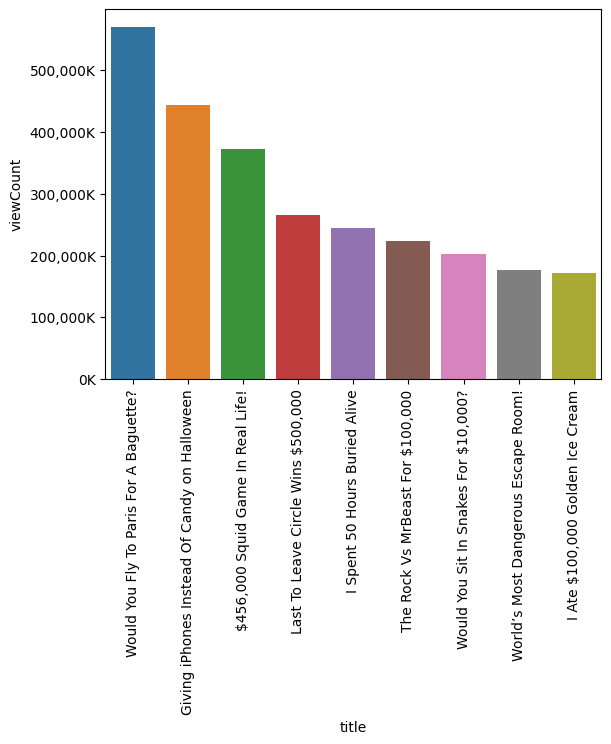

In [88]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### Worst performing videos

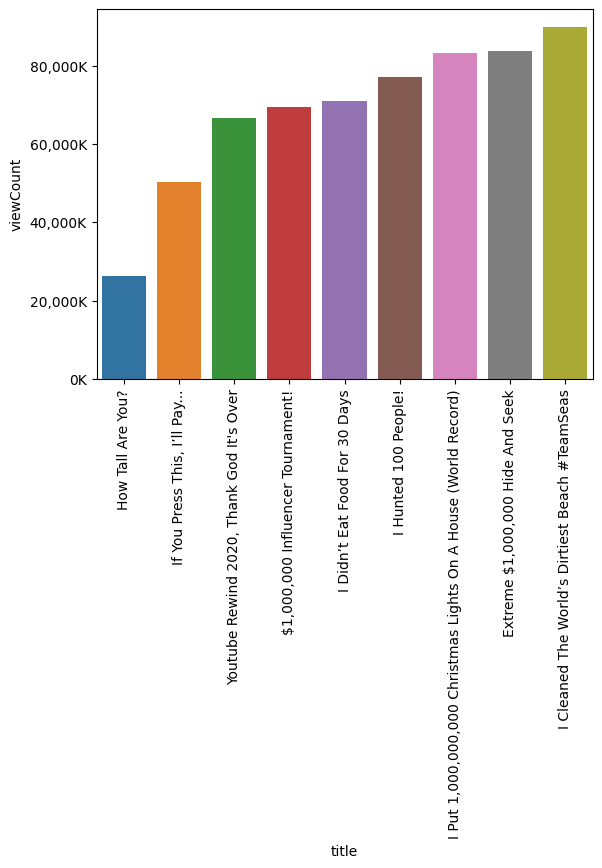

In [89]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

## Wordcloud for video titles

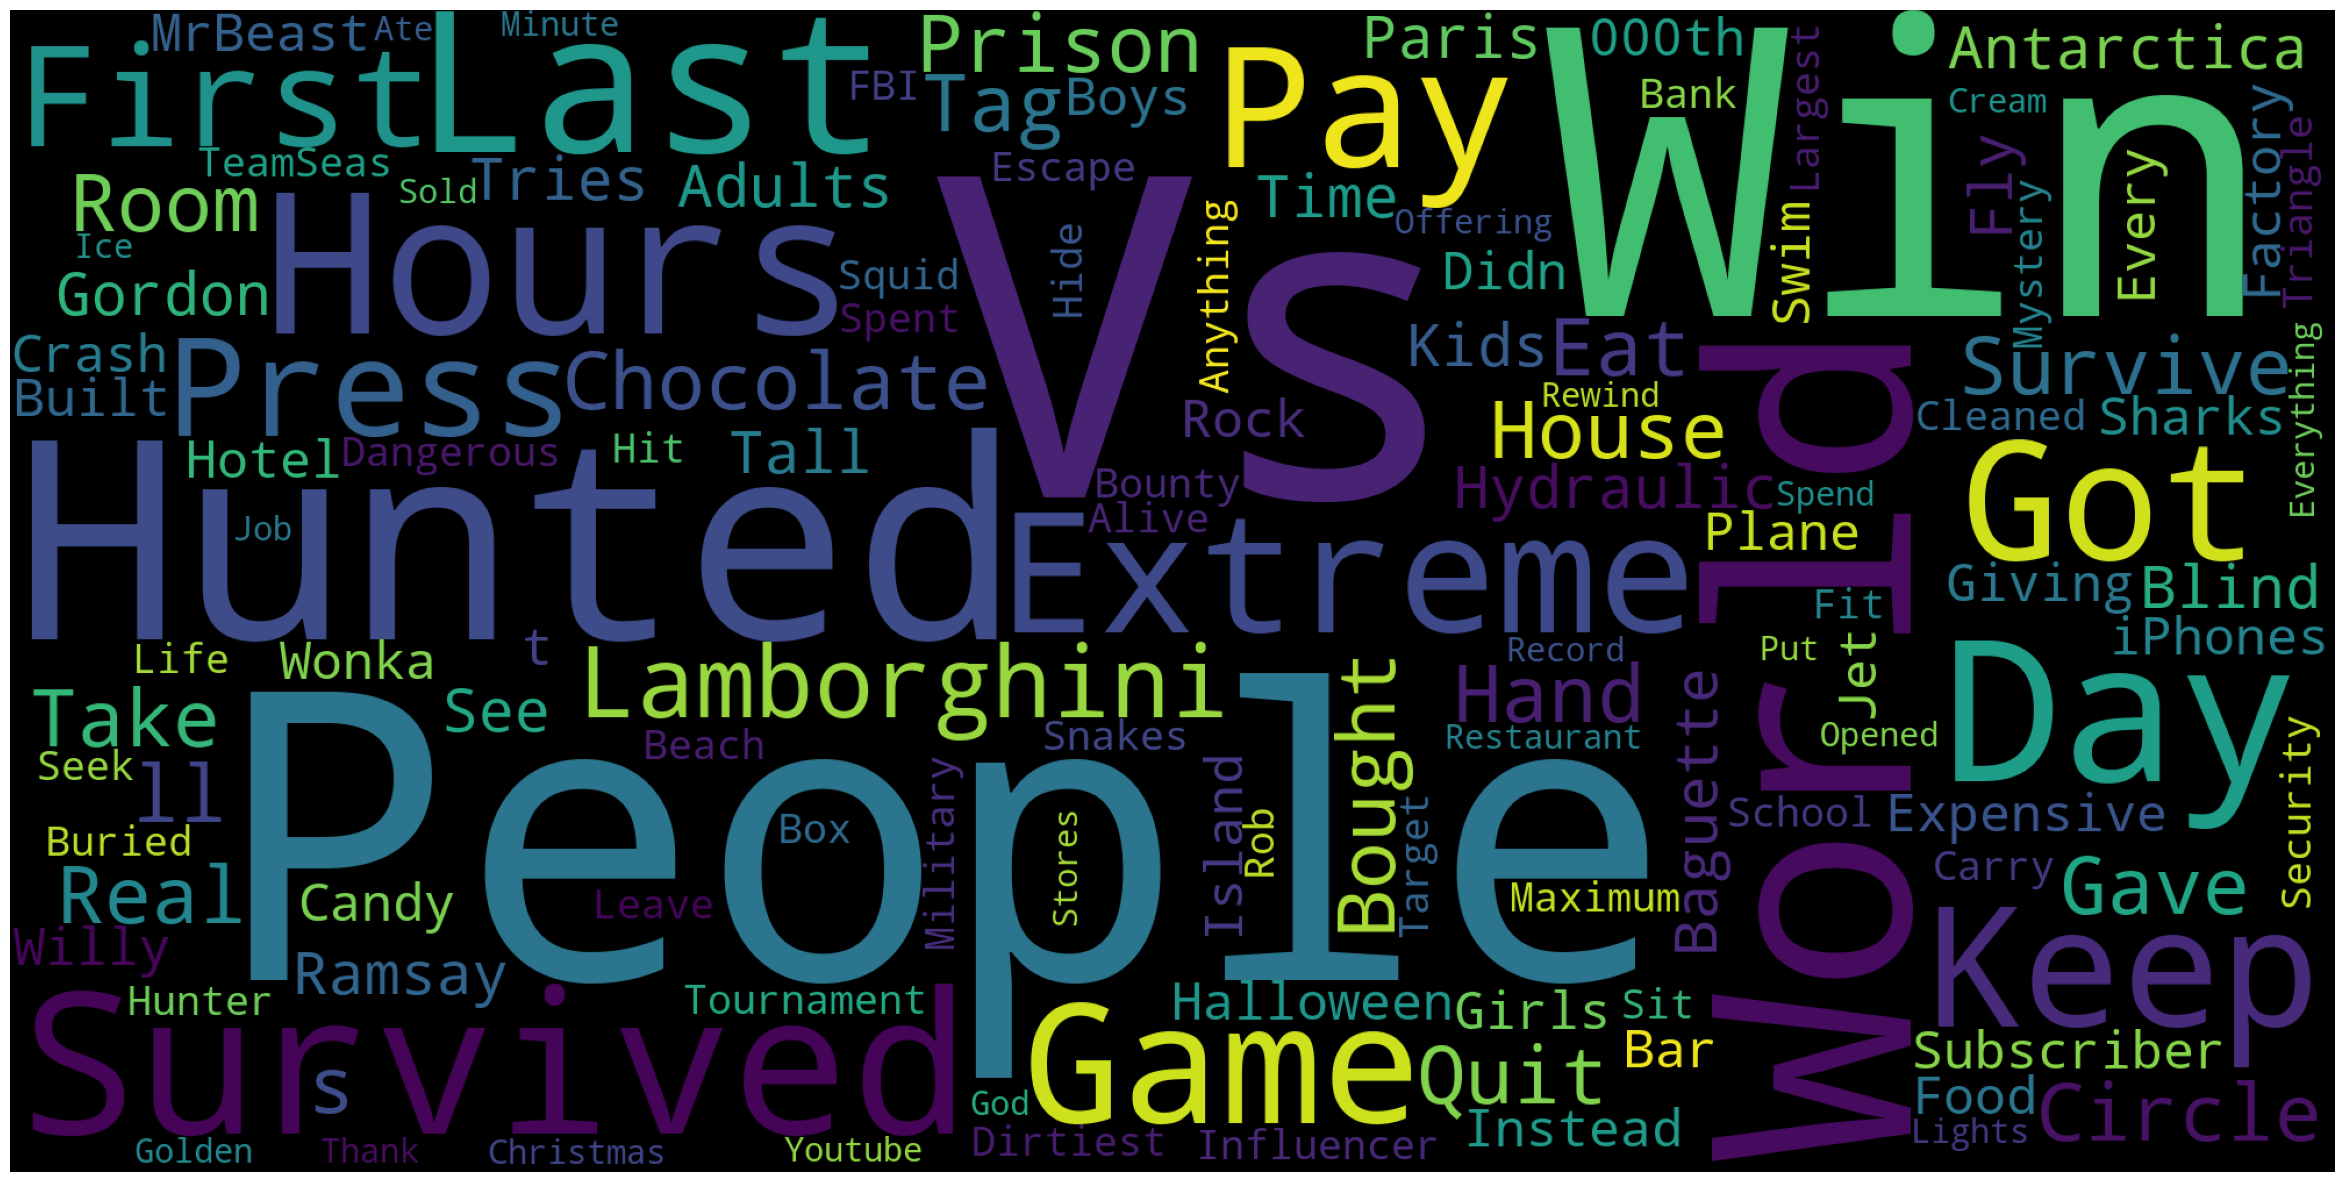

In [90]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### Upload schedule

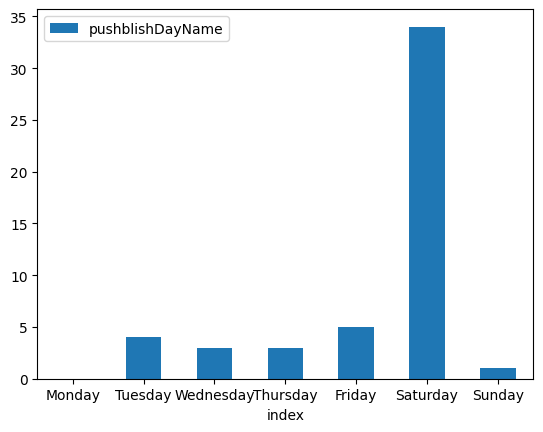

In [91]:
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)